In [3]:
import pandas as pd
filepath='bank.csv'
data = pd.read_csv(filepath, sep=';')

# Show the first few rows of the dataset
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# Check the columns and data types to make sure the dataset is correctly loaded
print(data.columns)
print(data.info())


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   45

In [6]:
# Use one-hot encoding to convert categorical variables to numeric
data_encoded = pd.get_dummies(data, drop_first=True)

# Inspect the encoded data
print(data_encoded.head())


   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   30     1787   19        79         1     -1         0            False   
1   33     4789   11       220         1    339         4            False   
2   35     1350   16       185         1    330         1            False   
3   30     1476    3       199         4     -1         0            False   
4   59        0    5       226         1     -1         0             True   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False      False   
1             False          False  ...      False      False       True   
2             False          False  ...      False      False      False   
3             False          False  ...       True      False      False   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encoded.drop('y_yes', axis=1)  # Drop target variable 'y' (encoded as 'y_yes')
y = data_encoded['y_yes']  # This is the target variable (1 if yes, 0 if no)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (3616, 42)
Testing set size: (905, 42)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.8806629834254144
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93       807
        True       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



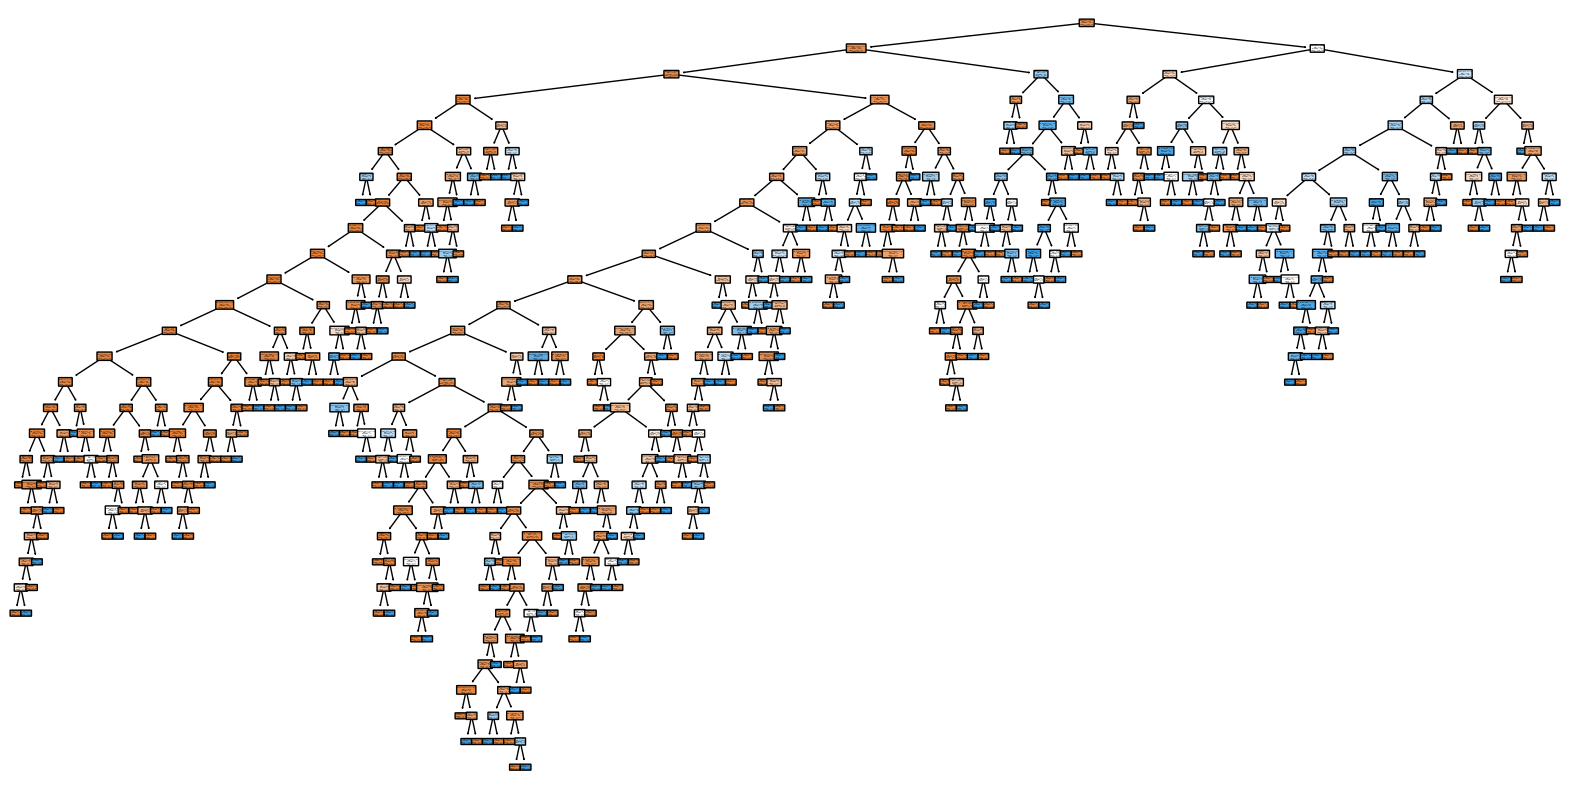

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


**Hyperparameter Tuning using GridSearchCV**

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


**Define the hyperparameters**

In [15]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider
}


**Initialize the GridSearchCV**

In [16]:
dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all cores
                           verbose=2,  # Show detailed results
                           scoring='accuracy')  # You can change the scoring metric to others like 'f1'


**Fit the GridSearchCV**

In [17]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

**Get the best hyperparameters**

In [18]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Evaluate the model with the best parameters**

In [19]:
# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy}")

# Classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy with Best Hyperparameters: 0.8939226519337017
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       807
        True       0.52      0.34      0.41        98

    accuracy                           0.89       905
   macro avg       0.72      0.65      0.67       905
weighted avg       0.88      0.89      0.88       905



plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


**Visualize the best decision tree**

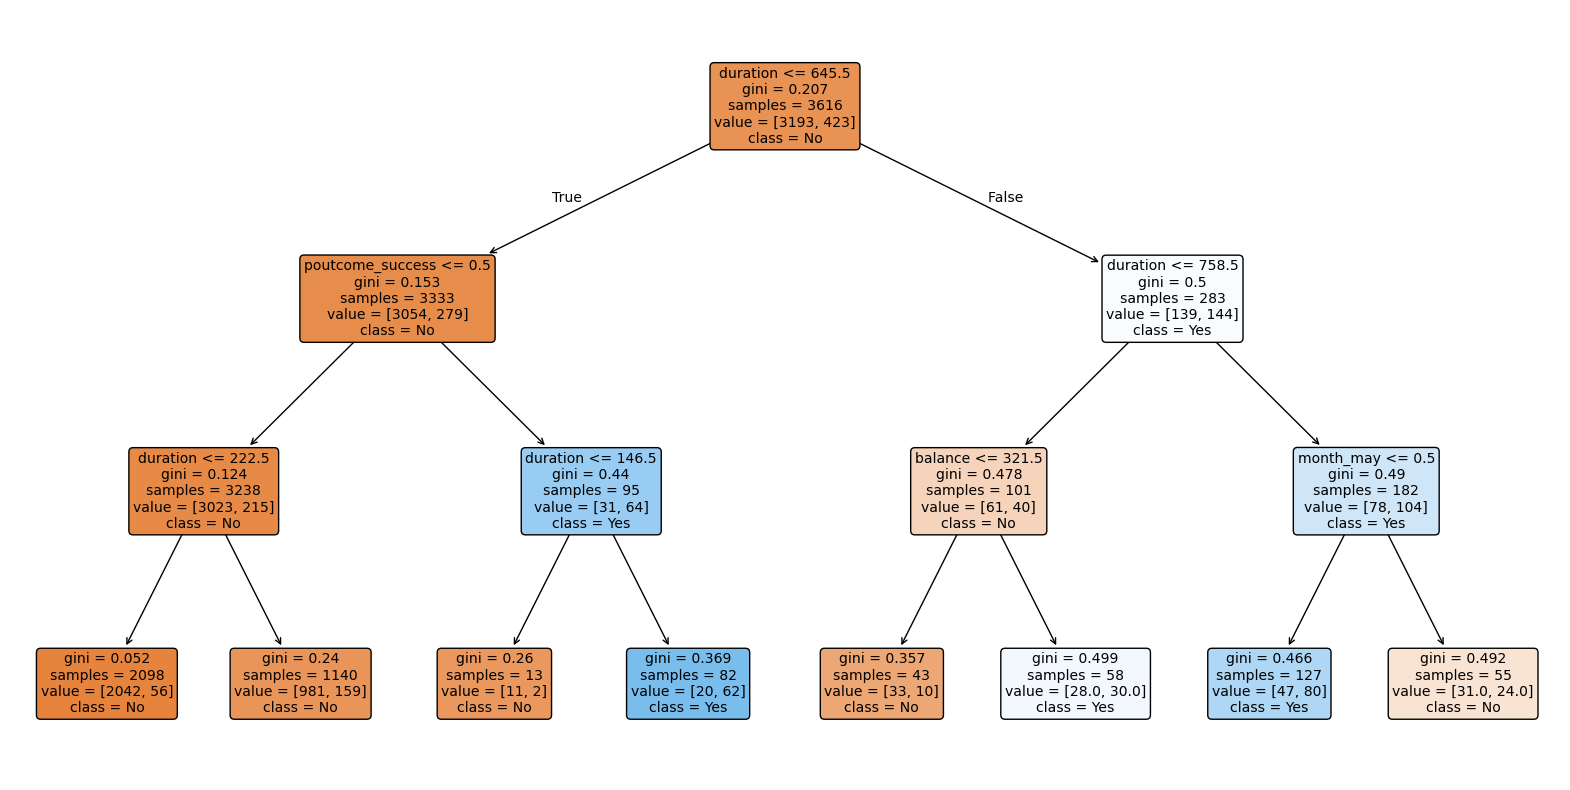

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()